# Japan's Consumption Function, IS-LM Curve and AD-AS Curve

### Step 1: Data import and Initial observations

In [2]:
import pandas as pd
df = pd.read_excel(r"D:\9. Self Projects\4. Econometrics Project\Economy of a Country\Original Datasets\Merged data.xlsx")
df.head()

,Year,Quarter_No,Policy Rate,Unemoployment Rate,CPI Rate,Inflation,Consumption,GDP_Bn
0,2000,1,0.036667,5.000000,99.024350,NaN,89.183528,479990.3
1,2000,2,0.026667,4.900000,99.261903,0.239894,89.598113,482123.9
2,2000,3,0.183333,4.866667,99.024350,-0.239320,89.625079,482261.0
3,2000,4,0.236667,4.966667,98.888603,-0.137084,90.489707,486917.4
4,2001,1,0.210000,4.933333,98.617120,-0.274535,91.170087,490540.7


In [3]:
df.isnull().sum()

Year                  0
Quarter_No            0
Policy Rate           0
Unemoployment Rate    0
CPI Rate              0
Inflation             1
Consumption           7
GDP_Bn                0
dtype: int64

In [4]:
df.dtypes

Year                    int64
Quarter_No              int64
Policy Rate           float64
Unemoployment Rate    float64
CPI Rate              float64
Inflation             float64
Consumption           float64
GDP_Bn                float64
dtype: object

In [5]:
df = df.dropna()

### Step 2: Data Pre-processing

In [6]:
# Create Real Variables, as already ahs real GDP finds -
df["Real_Consumption"] = df["Consumption"] / df["CPI Rate"]

In [7]:
# Log transform
import numpy as np

df["lnGDP"] = np.log(df["GDP_Bn"])
df["lnC"]   = np.log(df["Real_Consumption"])


### 1. The Consumption Function Model

In [11]:
# SLR Model
import statsmodels.api as sm

y = df['lnC']
X2 = sm.add_constant(df[["lnGDP", "Policy Rate"]])
model2 = sm.OLS(y, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                    lnC   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     152.8
Date:                Mon, 17 Nov 2025   Prob (F-statistic):           8.12e-30
Time:                        12:22:08   Log-Likelihood:                 251.90
No. Observations:                  94   AIC:                            -497.8
Df Residuals:                      91   BIC:                            -490.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.0910      0.519    -17.520      

### Visualizations [Diagnostic Plots]

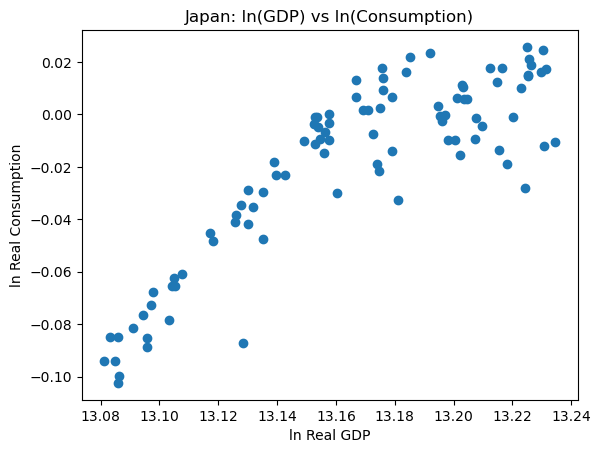

In [12]:
# Scatter plot
import matplotlib.pyplot as plt

plt.scatter(df["lnGDP"], df["lnC"])
plt.xlabel("ln Real GDP")
plt.ylabel("ln Real Consumption")
plt.title("Japan: ln(GDP) vs ln(Consumption)")
plt.show()


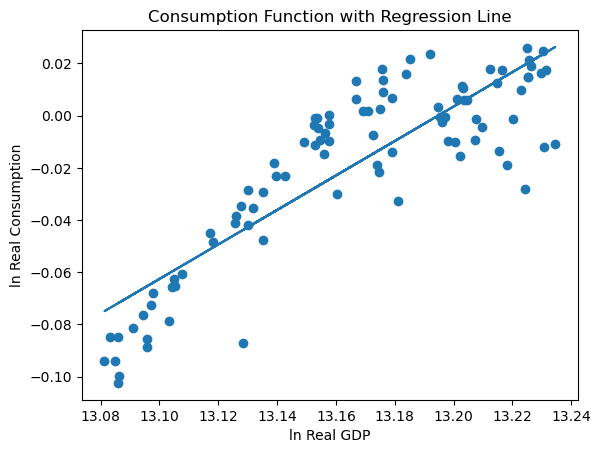

In [22]:
# Regression Line plot

y = df['lnC']
X = sm.add_constant(df[["lnGDP"]])
model1 = sm.OLS(y, X).fit()

pred = model1.predict(X)

plt.scatter(df["lnGDP"], df["lnC"])
plt.plot(df["lnGDP"], pred)
plt.xlabel("ln Real GDP")
plt.ylabel("ln Real Consumption")
plt.title("Consumption Function with Regression Line")
plt.show()


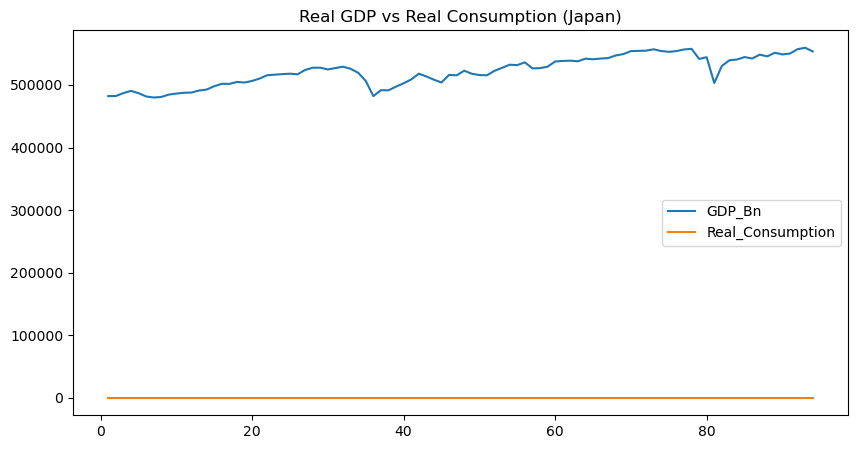

In [18]:
# Time series plot
df[["GDP_Bn", "Real_Consumption"]].plot(figsize=(10,5))
plt.title("Real GDP vs Real Consumption (Japan)")
plt.show()


### 2. IS-LM Curve

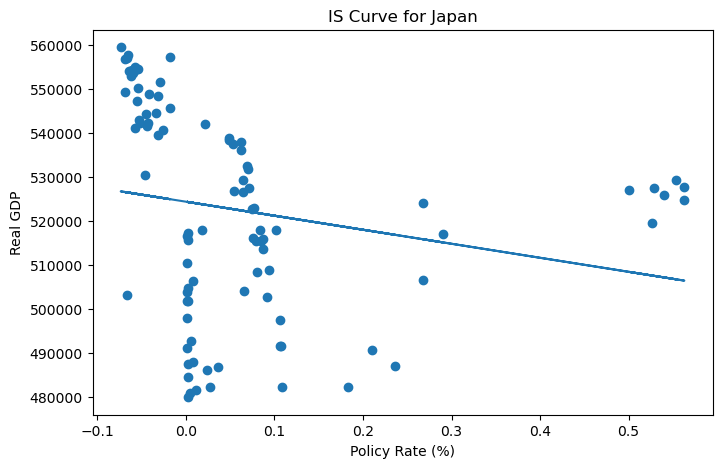

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Independent variable (i_t)
X = df["Policy Rate"]
# Dependent variable (Y_t)
Y = df["GDP_Bn"]

# Add constant for regression
X2 = sm.add_constant(X)
is_model = sm.OLS(Y, X2).fit()

# Predictions
df["IS_pred"] = is_model.predict(X2)

# Plot IS Curve
plt.figure(figsize=(8,5))
plt.scatter(df["Policy Rate"], df["GDP_Bn"])
plt.plot(df["Policy Rate"], df["IS_pred"])
plt.xlabel("Policy Rate (%)")
plt.ylabel("Real GDP")
plt.title("IS Curve for Japan")
plt.show()


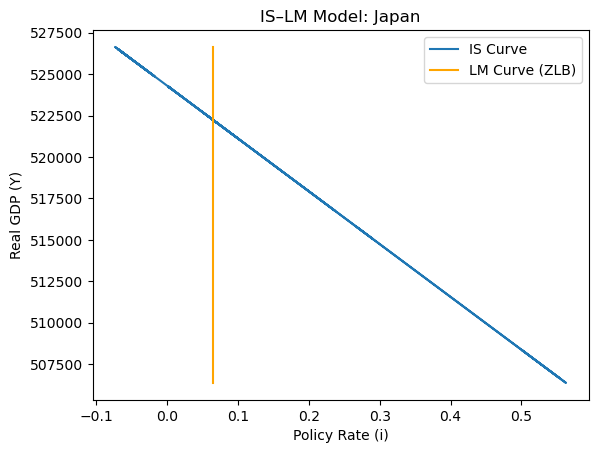

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# IS Curve from your regression
plt.plot(df["Policy Rate"], df["IS_pred"], label="IS Curve")

# LM Curve: horizontal at the average policy rate
lm_rate = df["Policy Rate"].mean()  # near zero for Japan
Y_values = np.linspace(df["IS_pred"].min(), df["IS_pred"].max(), 200)

plt.plot(
    [lm_rate]*len(Y_values), Y_values, 
    color="orange", 
    label="LM Curve (ZLB)"
)

plt.xlabel("Policy Rate (i)")
plt.ylabel("Real GDP (Y)")
plt.title("IS–LM Model: Japan")
plt.legend()
plt.show()


### 3. AD-AS Curve

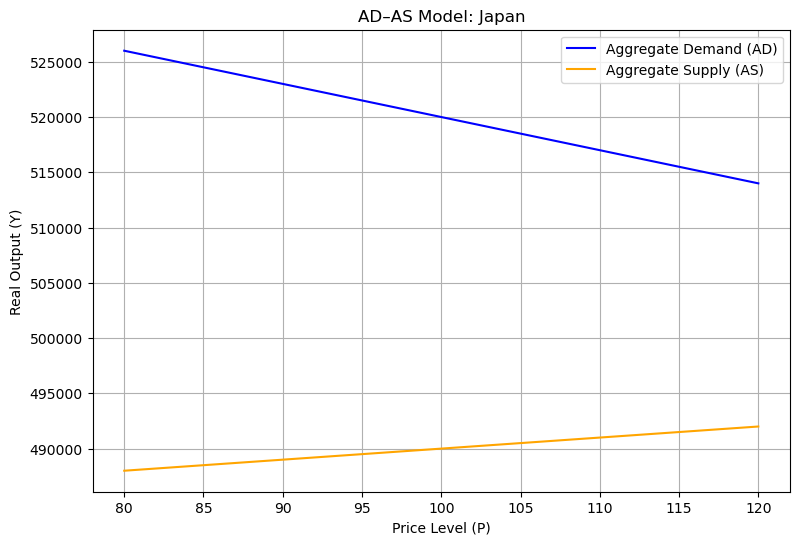

In [26]:
# As some data are not avilable using syntjetic data

import numpy as np
import matplotlib.pyplot as plt

# Price range
P = np.linspace(80, 120, 200)

# AD (weak downward slope)
AD = 550000 - 300 * P   

# AS (almost flat)
AS = 480000 + 100 * P   

plt.figure(figsize=(9,6))

plt.plot(P, AD, label="Aggregate Demand (AD)", color="blue")
plt.plot(P, AS, label="Aggregate Supply (AS)", color="orange")

# Labels
plt.xlabel("Price Level (P)")
plt.ylabel("Real Output (Y)")
plt.title("AD–AS Model: Japan")

plt.legend()
plt.grid(True)
plt.show()
